#### Group Members

- Aaron Meade (19271304)
- Ben Christie (19258275)
- David Condon (19279655)

#### Data Set Explanation
1. **cap-shape:** bell = **b**,conical = **c**, convex = **x**,flat = **f**, knobbed = **k**,sunken = **s**
2. **cap-surface:** fibrous = **f**, grooves = **g**, scaly = **y**, smooth = **s**
3. **cap-color:** brown = **n**,buff = **b**,cinnamon = **c**, gray = **g**,green = **r**, pink = **p**, purple = **u**, red = **e**, white= **w**, yellow = **y**
4. **bruises?:** bruises = **t**, no = **f**
5. **odor:** almond = **a**, anise = **l**, creosote = **c**, fishy = **y**, foul = **f**, musty = **m**, none = **n**, pungent = **p**, spicy = **s**
6. **gill-attachment:** attached = **a**, descending = **d**, free = **f**, notched = **n**
7. **gill-spacing:** close = **c**, crowded = **w**, distant = **d**
8. **gill-size:** broad = **b**, narrow = **n**
9. **gill-color:** black = **k**, brown = **n**, buff = **b**, chocolate = **h**, gray = **g**,  green = **r**, orange = **o**, pink = **p**, purple = **u**, red = **e**, white = **w**, yellow = **y**
10. **stalk-shape:** enlarging = **e**, tapering = **t**
11. **stalk-root:** bulbous = **b**, club = **c**, cup = **u**, equal = **e**, rhizomorphs = **z**, rooted = **r**, missing = **?**
12. **stalk-surface-above-ring:** fibrous = **f**, scaly = **y**, silky = **k**, smooth = **s**
13. **stalk-surface-below-ring:** fibrous = **f**, scaly = **y**, silky = **k**, smooth = **s**
14. **stalk-color-above-ring:** brown = **n**, buff = **b**, cinnamon = **c**, gray = **g**, orange = **o**, pink = **p**, red = **e**, white = **w**, yellow = **y**
15. **stalk-color-below-ring:** brown = **n**, buff = **b**, cinnamon = **c**, gray = **g**, orange = **o**, pink = **p**, red = **e**, white = **w**, yellow = **y**
16. **veil-type:** partial = **p**, universal = **u**
17. **veil-color:** brown = **n**, orange = **o**, white = **w**, yellow = **y**
18. **ring-number:** none = **n**, one = **o**, two = **t**
19. **ring-type:** cobwebby = **c**, evanescent = **e**, flaring = **f**, large = **l**, none = **n**, pendant = **p**, sheathing = **s**, zone = **z**
20. **spore-print-color:** black = **k**, brown = **n**, buff = **b**, chocolate = **h**, green = **r**, orange = **o**, purple = **u**, white = **w**, yellow = **y**
21. **population:** abundant = **a**, clustered = **c**, numerous = **n**, scattered = **s**, several = **v**, solitary = **y**
22. **habitat:** grasses = **g**, leaves = **l**, meadows = **m**, paths = **p**, urban = **u**, waste = **w**, woods = **d**
23. **class:** edible = **e**, poisonous = **p**

#### Import Module and Data Set

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import scipy

In [24]:
df = pd.read_csv('./mushrooms_sample.csv')
df.rename(columns={"bruises%3F": "bruises?"}, inplace=True)

#### Exploratory Data Analysis

In [25]:
df.head(6)

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,f,e,t,n,f,c,b,u,t,...,p,g,p,w,o,p,k,v,d,e
1,f,y,g,t,n,f,c,b,u,t,...,w,g,p,w,o,p,k,v,d,e
2,x,s,p,t,n,f,c,b,w,e,...,w,e,p,w,t,e,w,c,w,e
3,b,s,w,f,n,f,w,b,g,e,...,w,w,p,w,t,p,w,n,g,e
4,f,y,e,t,n,f,c,b,w,t,...,p,p,p,w,o,p,n,v,d,e
5,x,y,g,t,n,f,c,b,p,t,...,w,p,p,w,o,p,k,v,d,e


In [26]:
df.tail(6)

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
3994,x,y,e,f,f,f,c,n,b,t,...,w,p,p,w,o,e,w,v,d,p
3995,f,y,e,f,y,f,c,n,b,t,...,p,p,p,w,o,e,w,v,p,p
3996,f,s,w,t,n,f,c,b,w,e,...,w,w,p,w,t,p,r,v,g,p
3997,f,s,w,t,n,f,c,b,w,e,...,w,w,p,w,t,p,r,v,m,p
3998,f,y,e,f,s,f,c,n,b,t,...,p,p,p,w,o,e,w,v,l,p
3999,f,s,n,f,y,f,c,n,b,t,...,p,w,p,w,o,e,w,v,d,p


We can see that the dataset has a total of 4000 data rows, and all attributes are categorical attributes (non-numeric).
The final attribute `class` indicates whether or not a particular mushroom is regarded as edible (e) or poisonous (p), this is the attribute we want to learn to predict.

In [27]:
df.count()

cap-shape                   4000
cap-surface                 4000
cap-color                   4000
bruises?                    4000
odor                        4000
gill-attachment             4000
gill-spacing                4000
gill-size                   4000
gill-color                  4000
stalk-shape                 4000
stalk-root                  2770
stalk-surface-above-ring    4000
stalk-surface-below-ring    4000
stalk-color-above-ring      4000
stalk-color-below-ring      4000
veil-type                   4000
veil-color                  4000
ring-number                 4000
ring-type                   4000
spore-print-color           4000
population                  4000
habitat                     4000
class                       4000
dtype: int64

From the counts above we can see that all columns contain the full 4000 entries expected, except for `stalk-root` which has 2770 (1230 missing values)

The data naming convention is incredibly abstract and unintuitive, requiring constant revision to the data keys at the top of the file, this abstraction seemed unnecessary and so we decided it was worth spending the time reverting it to the standard descriptors

In [42]:
df['cap-shape'] = df['cap-shape'].replace({'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 
                                           's': 'sunken'})
df['cap-surface'] = df['cap-surface'].replace({'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'})
df['cap-color'] = df['cap-color'].replace({'n': 'brown', 'b': 'buff', 'c': 'cinammon', 'g': 'gray', 'r': 'green', 
                                           'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'})
df['bruises?'] = df['bruises?'].replace({'t': 'true', 'f': 'false'})
df['odor'] = df['odor'].replace({'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 
                                'n': 'none', 'p': 'pungent', 's': 'spicy'})
df['gill-attachment'] = df['gill-attachment'].replace({'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'})
df['gill-spacing'] = df['gill-spacing'].replace({'c': 'close', 'w': 'crowded', 'd': 'distant'})
df['gill-size'] = df['gill-size'].replace({'b': 'broad', 'n': 'narrow'})
df['gill-color'] = df['gill-color'].replace({'n': 'brown', 'k': 'black', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 
                                             'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 
                                             'w': 'white', 'y': 'yellow'})
df['stalk-shape'] = df['stalk-shape'].replace({'e': 'enlarging', 't': 'tapering'})
df['stalk-root'] = df['stalk-root'].replace({'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 
                                             'r': 'rooted'})
df['stalk-surface-above-ring'] = df['stalk-surface-above-ring'].replace({'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 
                                                                         's': 'smooth'})
df['stalk-surface-below-ring'] = df['stalk-surface-below-ring'].replace({'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 
                                                                         's': 'smooth'})
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].replace({'n': 'brown', 'b': 'buff', 'c': 'cinammon', 
                                                                     'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 
                                                                     'w': 'white', 'y': 'yellow'})
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].replace({'n': 'brown', 'b': 'buff', 'c': 'cinammon', 
                                                                     'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 
                                                                     'w': 'white', 'y': 'yellow'})
df['veil-type'] = df['veil-type'].replace({'p': 'partial', 'u': 'universal'})
df['veil-color'] = df['veil-color'].replace({'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'})
df['ring-number'] = df['ring-number'].replace({'n': 'none', 'o': 'one', 't': 'two'})
df['ring-type'] = df['ring-type'].replace({'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none',
                                           'p': 'pendant', 's': 'sheating', 'z': 'zone'})
df['spore-print-color'] = df['spore-print-color'].replace({'n': 'brown', 'k': 'black', 'b': 'buff', 'h': 'chocolate', 
                                                           'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 
                                                           'y': 'yellow'})
df['population'] = df['population'].replace({'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 
                                             'v': 'several', 'y': 'solitary'})
df['habitat'] = df['habitat'].replace({'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 
                                       'w': 'waste', 'd': 'woods'})
df['class'] = df['class'].replace({'e': 'edible', 'p': 'poisonous'})

However, in the `stalk-root` explanation we are given a value that should be put in place where the data is missing (?)

In [43]:
# replace null values with '?'
df['stalk-root'].fillna('?', inplace=True)

In [44]:
df.count()

cap-shape                   4000
cap-surface                 4000
cap-color                   4000
bruises?                    4000
odor                        4000
gill-attachment             4000
gill-spacing                4000
gill-size                   4000
gill-color                  4000
stalk-shape                 4000
stalk-root                  4000
stalk-surface-above-ring    4000
stalk-surface-below-ring    4000
stalk-color-above-ring      4000
stalk-color-below-ring      4000
veil-type                   4000
veil-color                  4000
ring-number                 4000
ring-type                   4000
spore-print-color           4000
population                  4000
habitat                     4000
class                       4000
dtype: int64

As we can see, now the 1230 missing values have been replaced with the ? character

Get the number of each type in each attribute column

In [65]:
# loop over each column and get the value counts
count_data = {}

for col in df.columns:
    counts = df[col].value_counts()
    count_data[col] = counts.tolist()
    
    print(f"Value counts for column {col}:")
    print(f'{counts} \n')

Value counts for column cap-shape:
convex     1758
flat       1593
knobbed     411
bell        217
sunken       20
conical       1
Name: cap-shape, dtype: int64 

Value counts for column cap-surface:
scaly      1620
smooth     1247
fibrous    1131
grooves       2
Name: cap-surface, dtype: int64 

Value counts for column cap-color:
brown       1154
gray         917
red          727
white        501
yellow       496
buff          88
pink          83
cinammon      17
green         10
purple         7
Name: cap-color, dtype: int64 

Value counts for column bruises?:
false    2334
true     1666
Name: bruises?, dtype: int64 

Value counts for column odor:
none        1692
foul        1099
spicy        288
fishy        285
anise        190
almond       188
pungent      142
creosote     100
musty         16
Name: odor, dtype: int64 

Value counts for column gill-attachment:
free        3901
attached      99
Name: gill-attachment, dtype: int64 

Value counts for column gill-spacing:
close      

In [86]:
df.head()

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,convex,fibrous,red,true,none,free,close,broad,purple,tapering,...,pink,gray,partial,white,one,pendant,black,several,woods,edible
1,flat,scaly,gray,true,none,free,close,broad,purple,tapering,...,white,gray,partial,white,one,pendant,black,several,woods,edible
2,convex,smooth,pink,true,none,free,close,broad,white,enlarging,...,white,red,partial,white,two,evanescent,white,clustered,waste,edible
3,bell,smooth,white,false,none,free,crowded,broad,gray,enlarging,...,white,white,partial,white,two,pendant,white,numerous,grasses,edible
4,flat,scaly,red,true,none,free,close,broad,white,tapering,...,pink,pink,partial,white,one,pendant,brown,several,woods,edible


In [94]:
for col in df.columns:
    frequency_table = df[col].value_counts(ascending = False)
    print(f'Frequency Table for {col}:\n{frequency_table}')



Frequency Table for cap-shape:
convex     1758
flat       1593
knobbed     411
bell        217
sunken       20
conical       1
Name: cap-shape, dtype: int64
Frequency Table for cap-surface:
scaly      1620
smooth     1247
fibrous    1131
grooves       2
Name: cap-surface, dtype: int64
Frequency Table for cap-color:
brown       1154
gray         917
red          727
white        501
yellow       496
buff          88
pink          83
cinammon      17
green         10
purple         7
Name: cap-color, dtype: int64
Frequency Table for bruises?:
false    2334
true     1666
Name: bruises?, dtype: int64
Frequency Table for odor:
none        1692
foul        1099
spicy        288
fishy        285
anise        190
almond       188
pungent      142
creosote     100
musty         16
Name: odor, dtype: int64
Frequency Table for gill-attachment:
free        3901
attached      99
Name: gill-attachment, dtype: int64
Frequency Table for gill-spacing:
close      3384
crowded     616
Name: gill-spacing,

Now we can see a further breakdown of each attribute into each distinct possible value, however, looking at rows of numbers is difficult to consume, thus, we can display them in bar charts to aid this

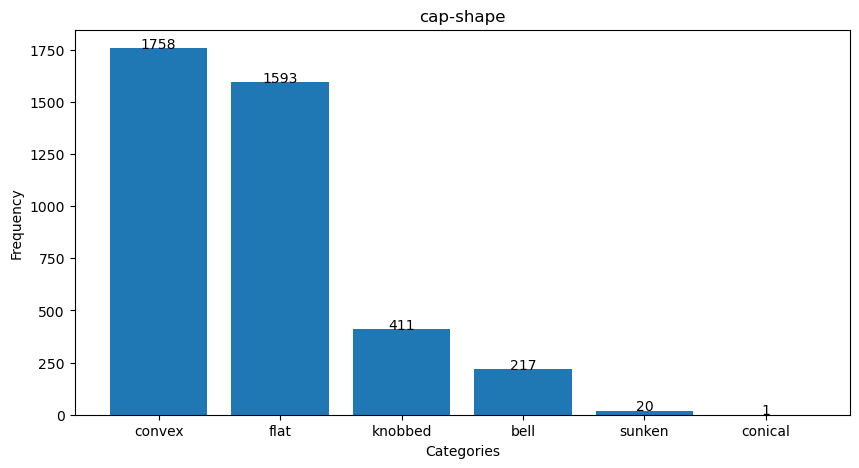

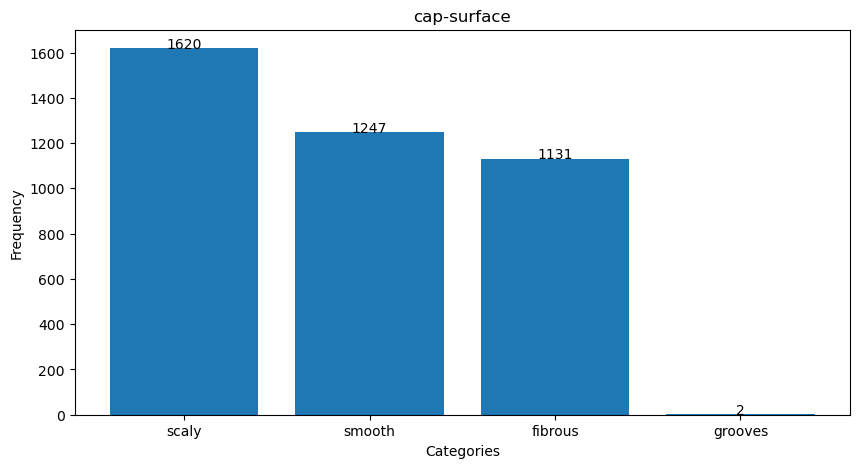

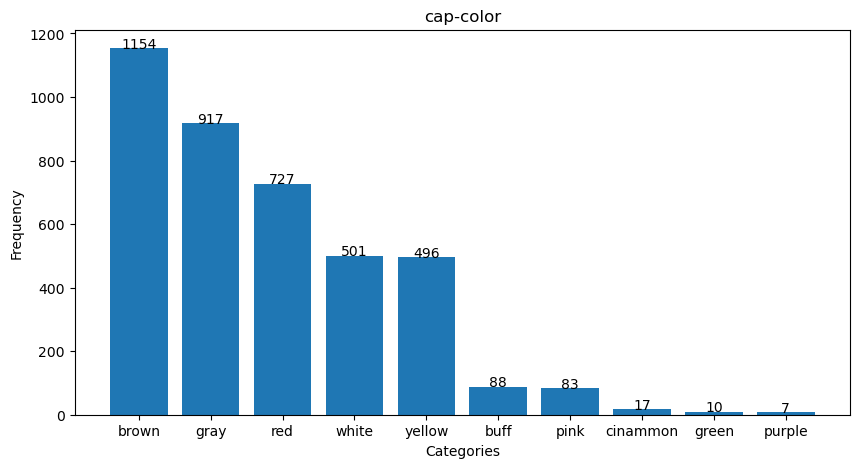

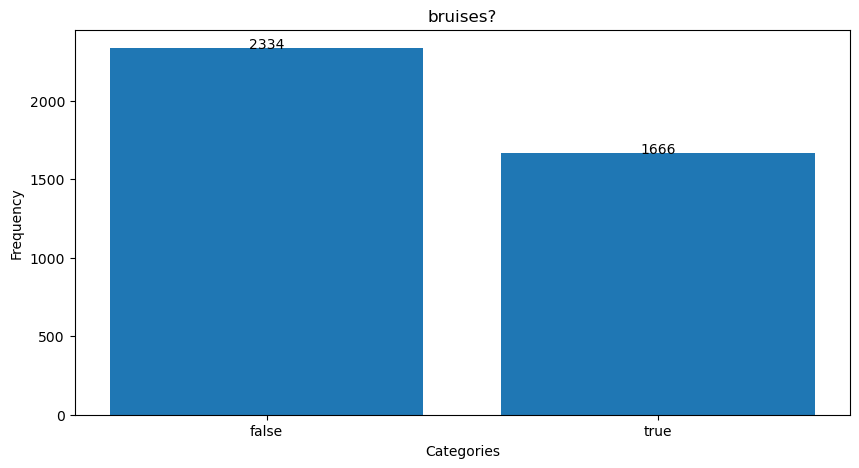

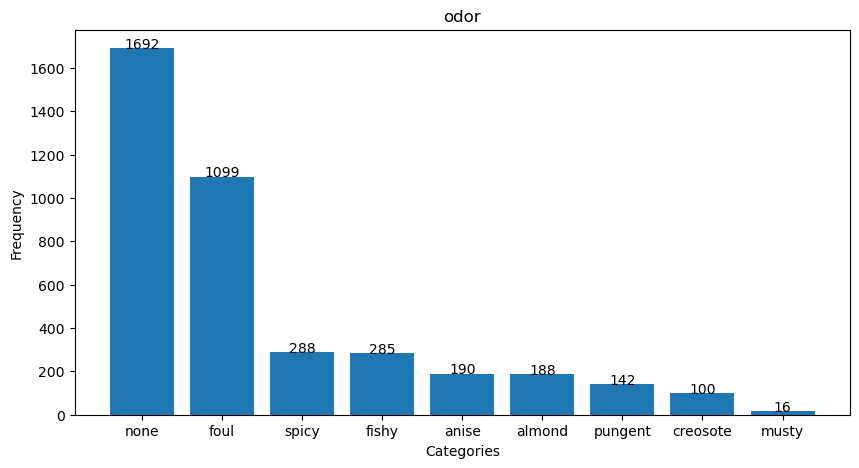

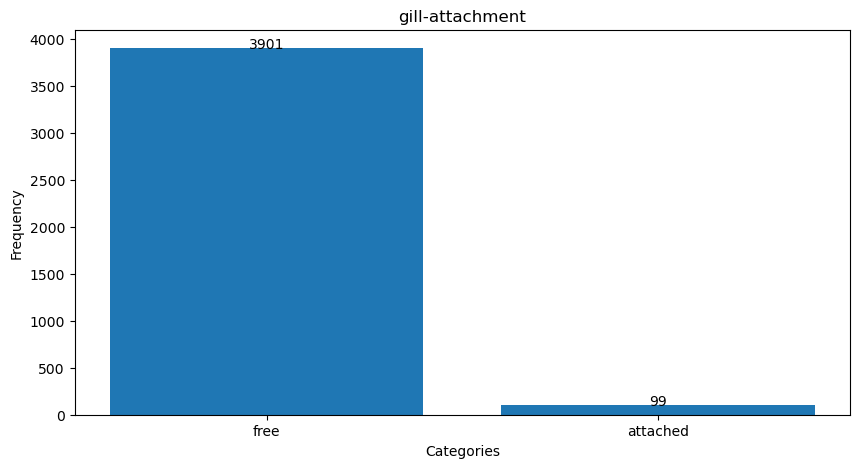

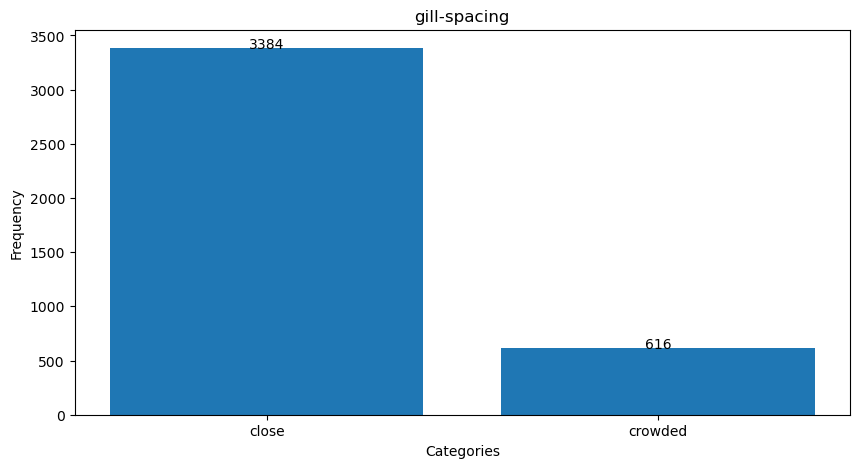

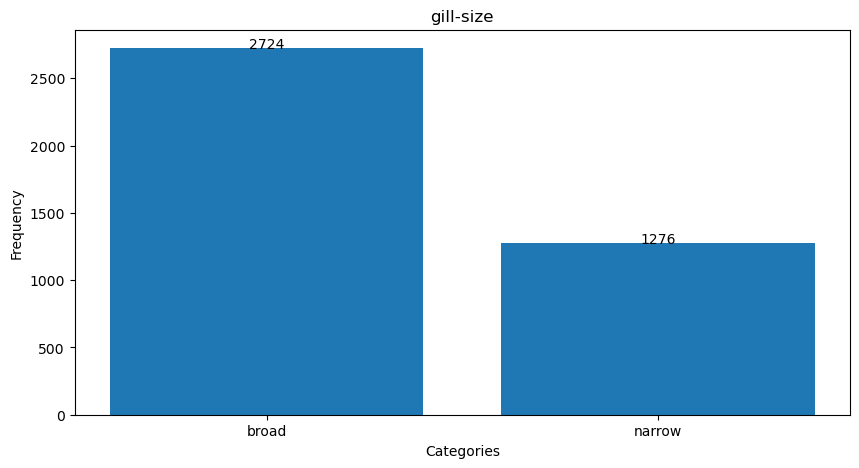

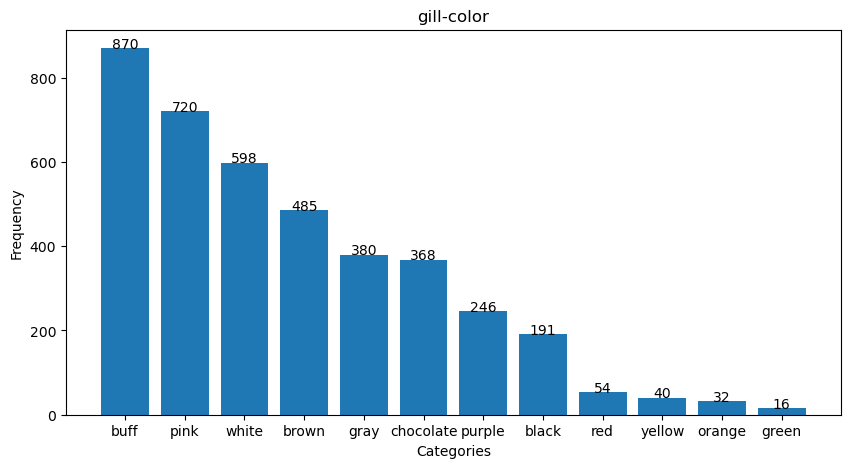

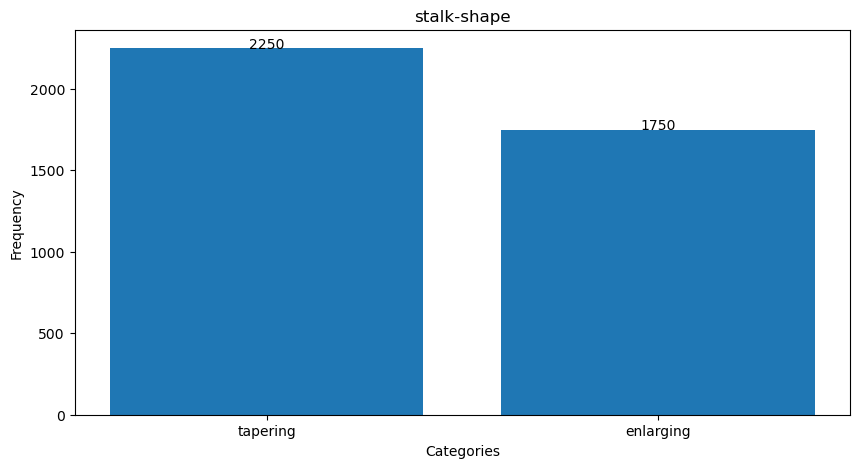

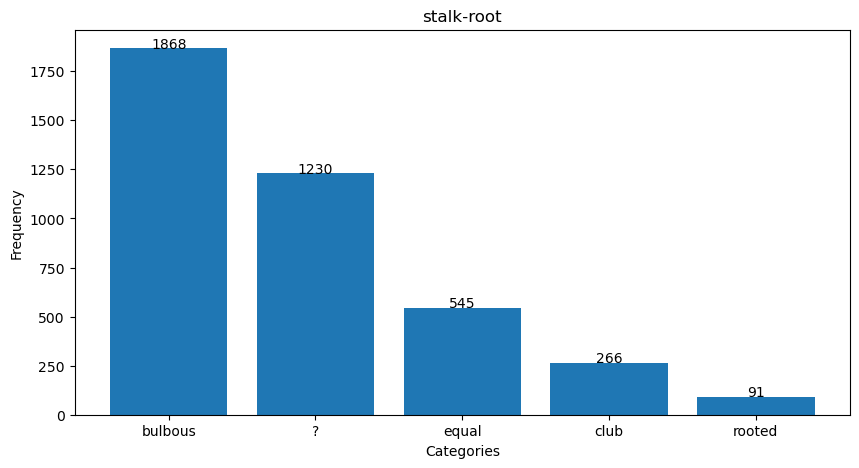

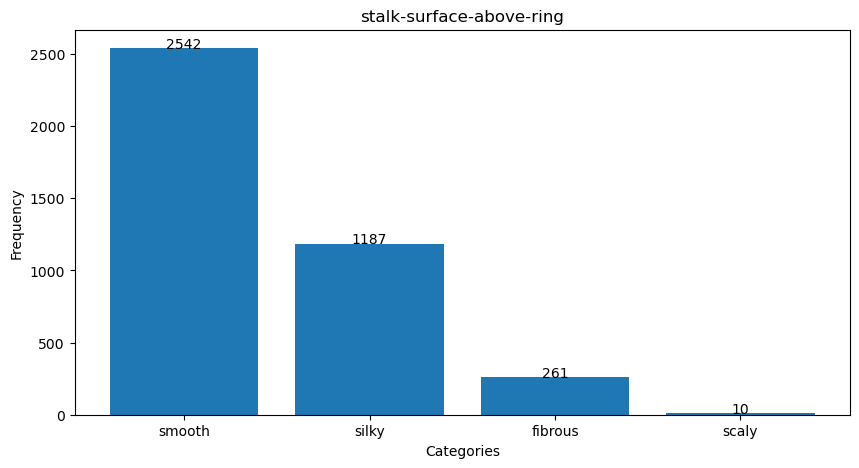

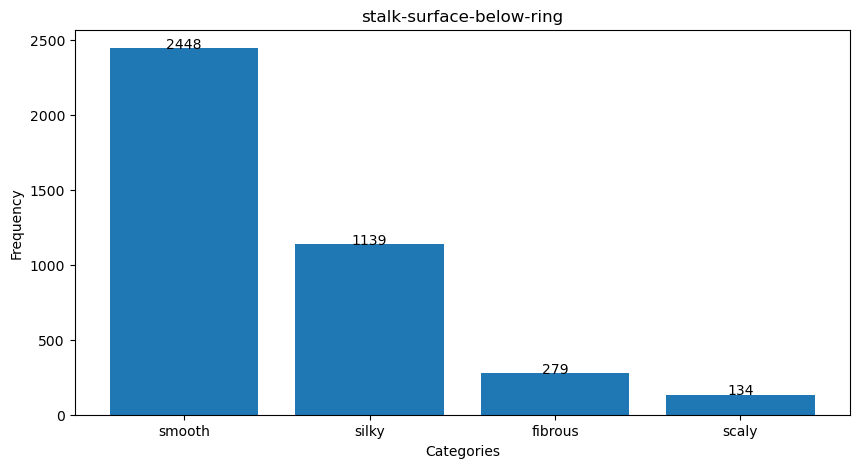

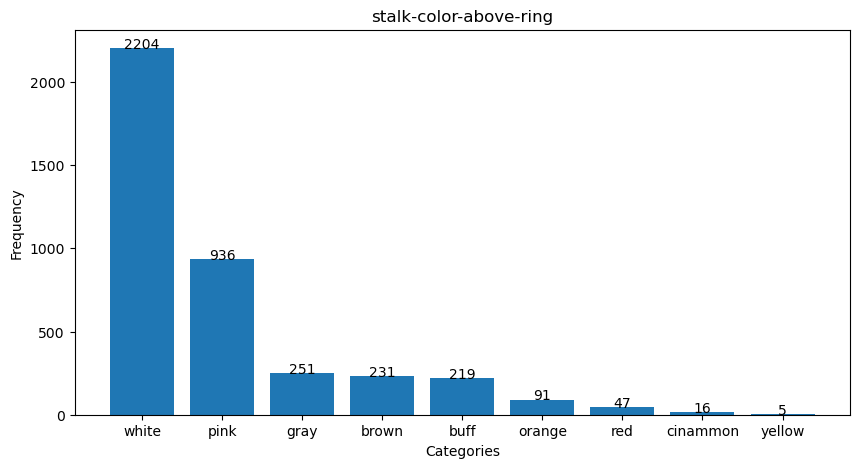

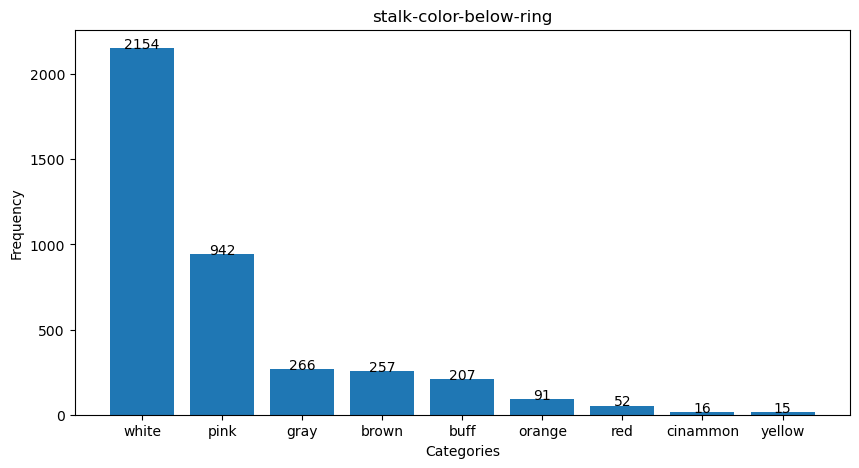

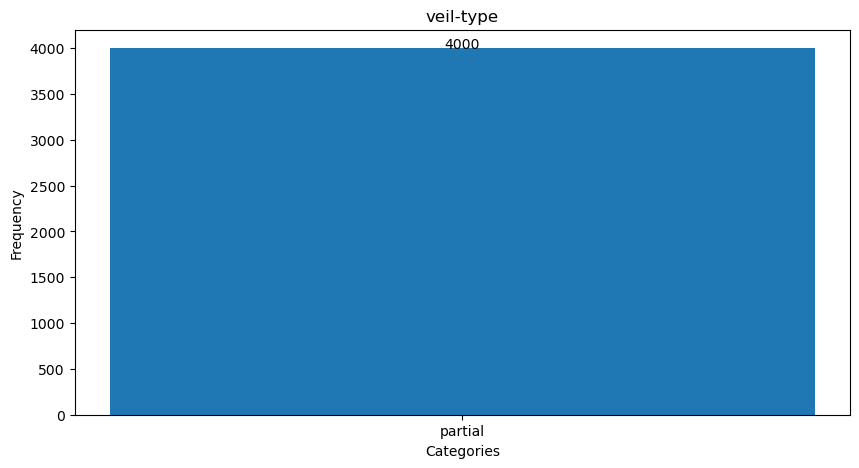

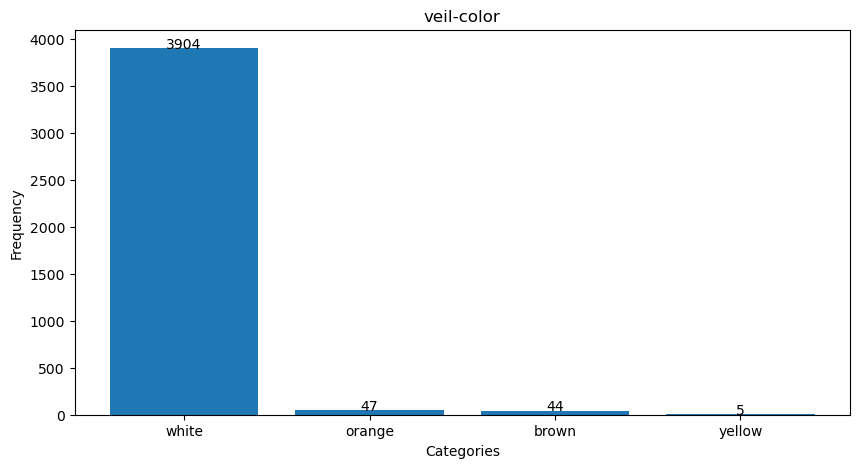

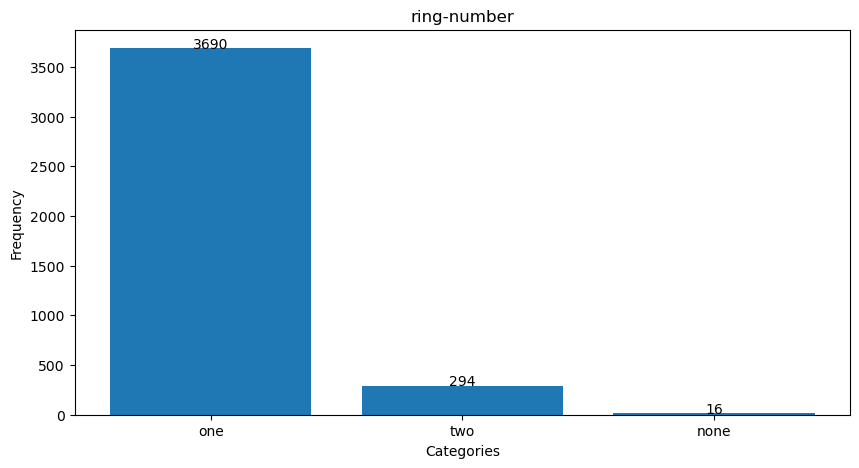

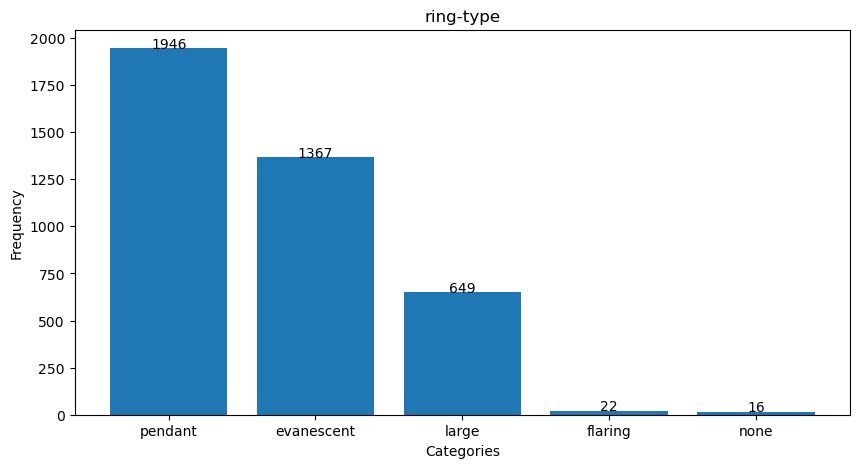

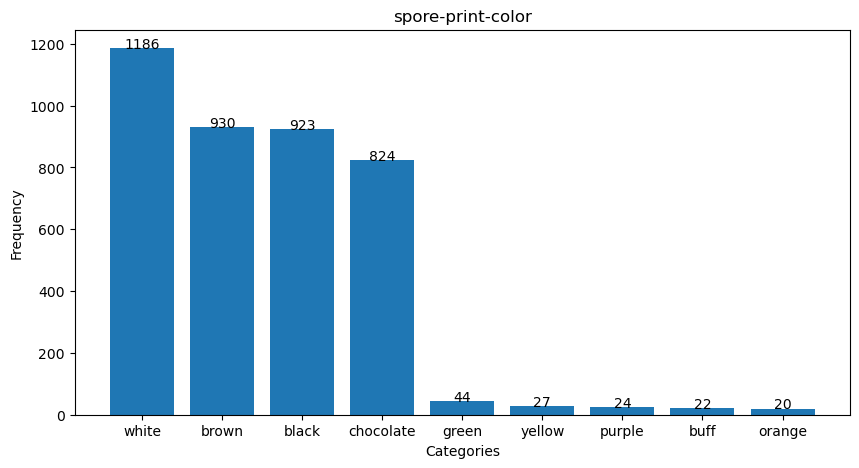

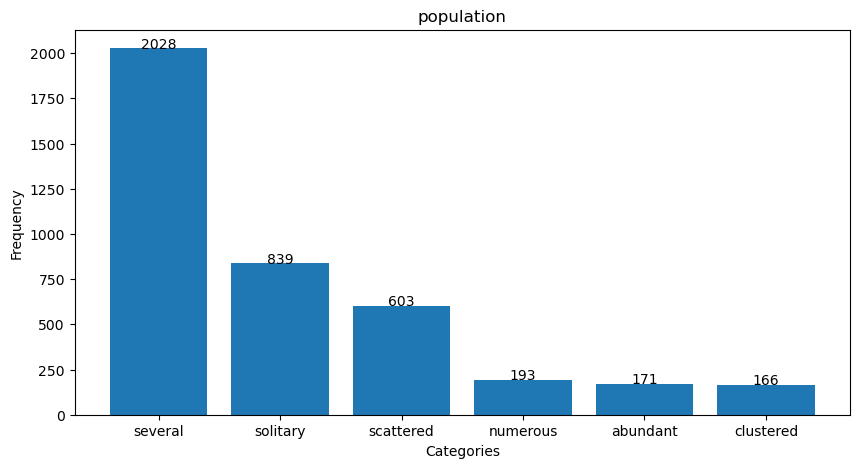

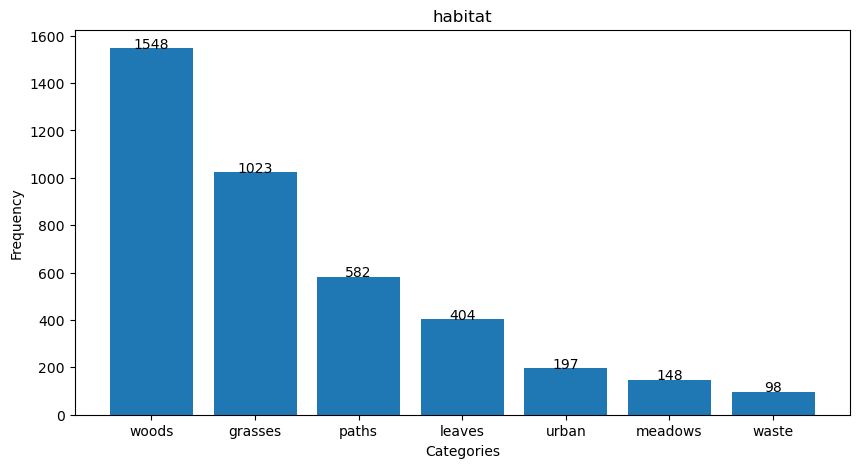

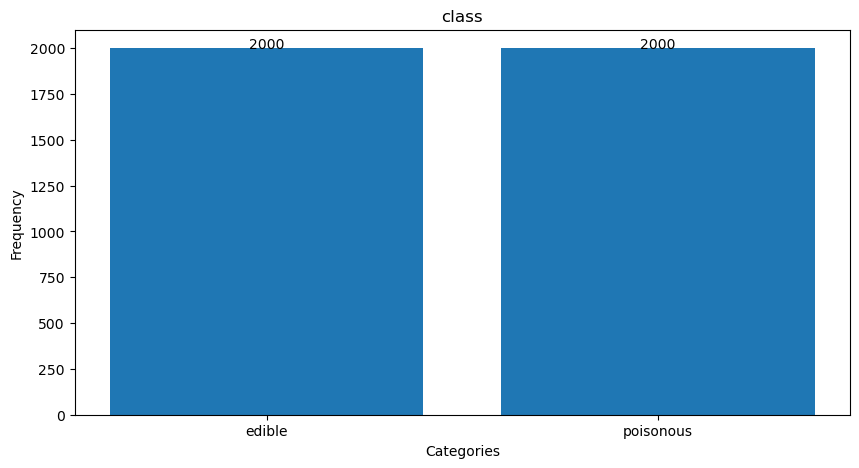

In [91]:
for col in df.columns:
    counts = df[col].value_counts()
    plt.figure(figsize=(10, 5))  # set the figure size
    plt.bar(counts.index, counts.values)
    plt.title(col)
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    # add text to the plot showing the count on each bar
    for i, count in enumerate(counts.values):
        plt.text(i, count, str(count), ha='center')
    plt.show()


These bar charts give us a clearer understanding of the distribution of the data for each attribute

However, this is still missing the key information, what is the split of poisonous and edible mushrooms?

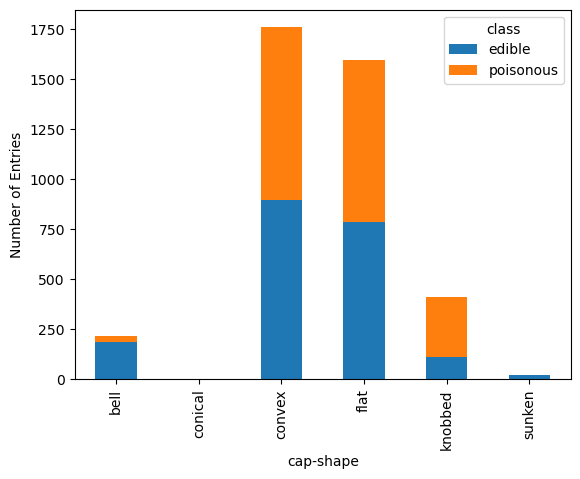

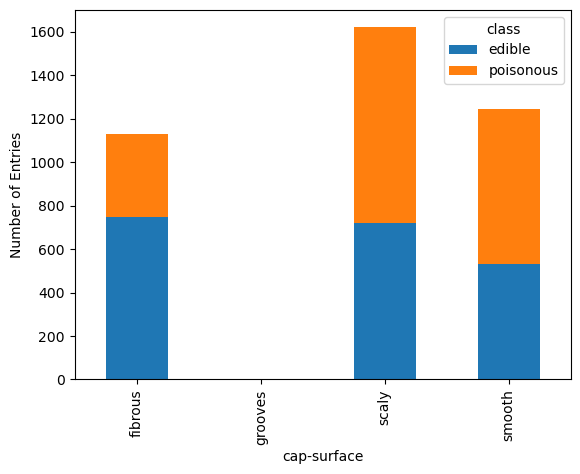

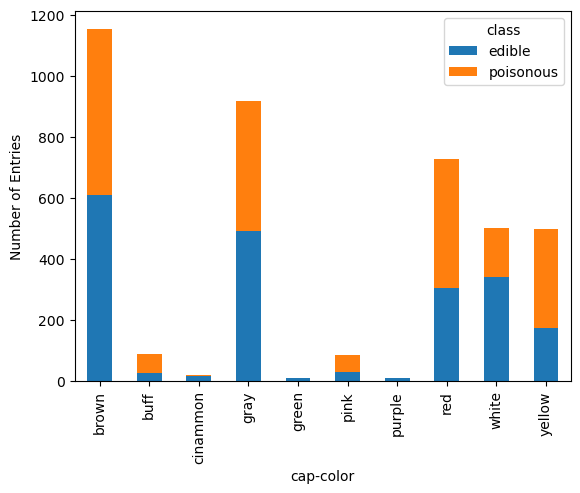

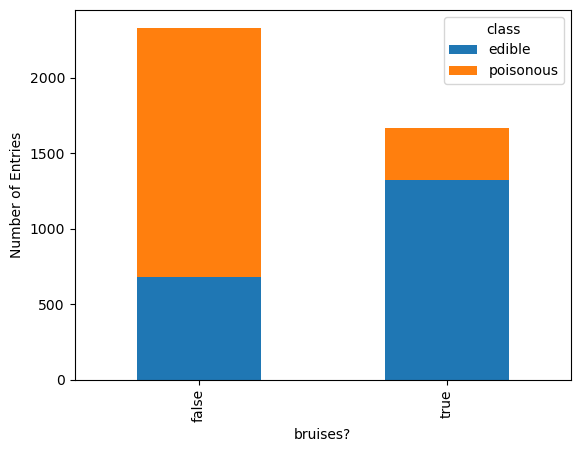

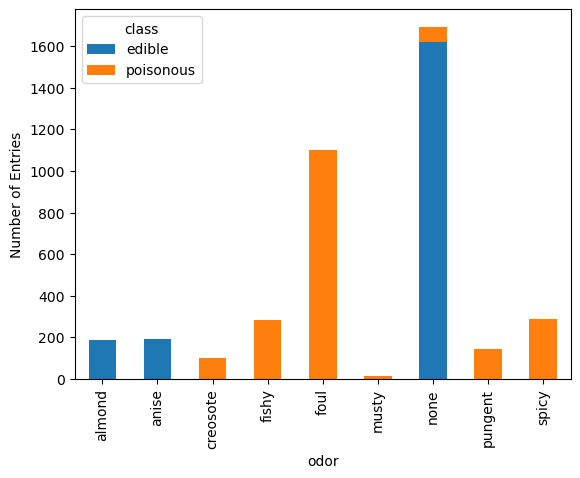

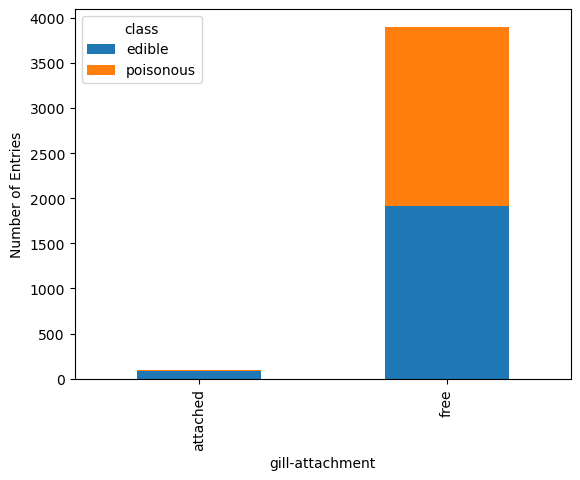

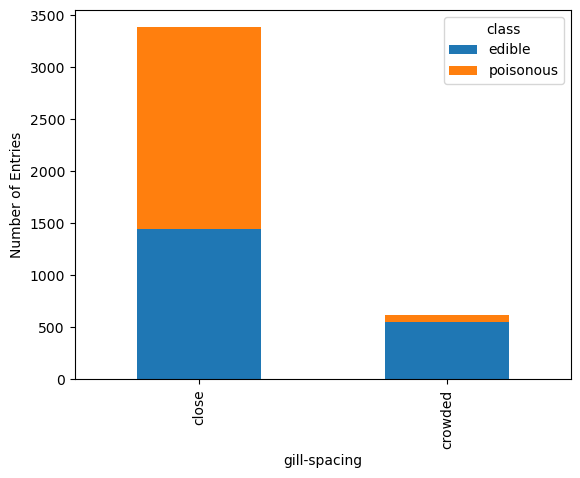

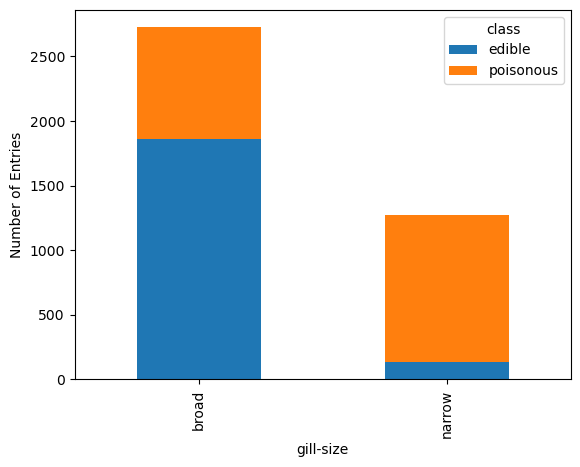

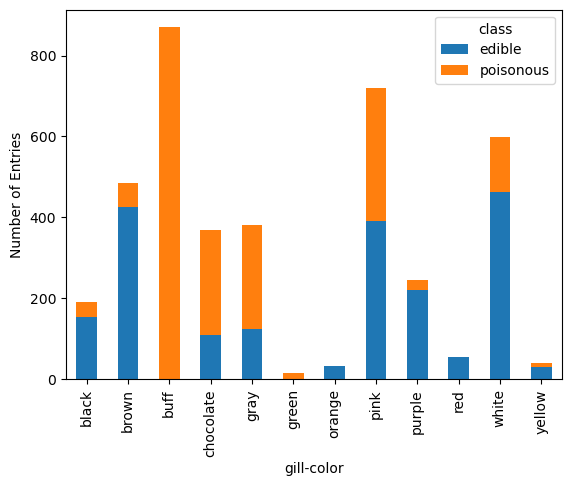

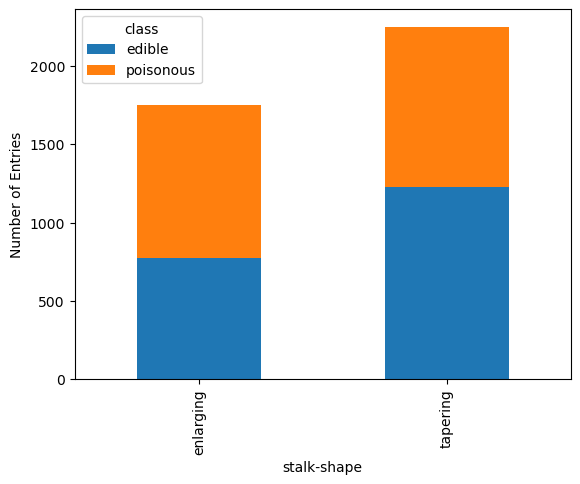

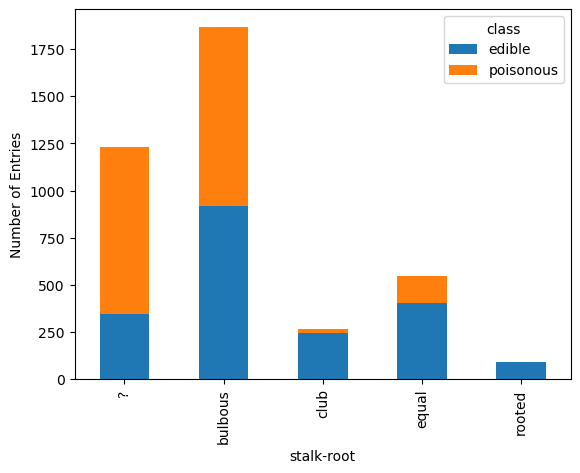

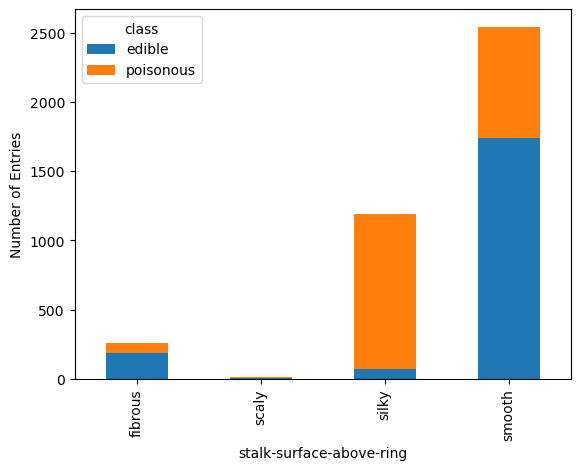

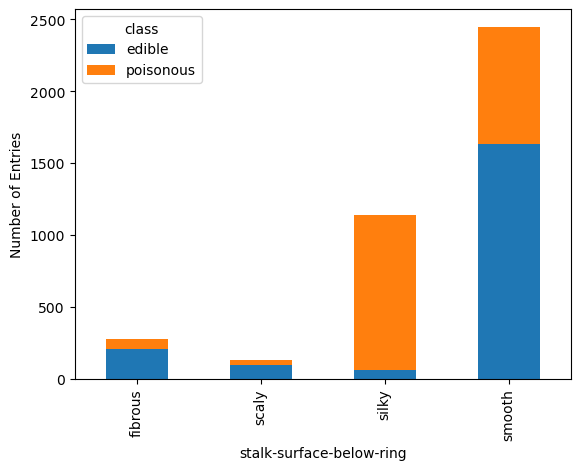

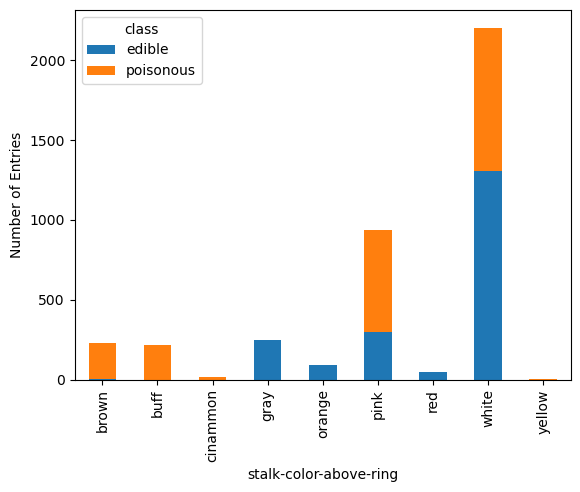

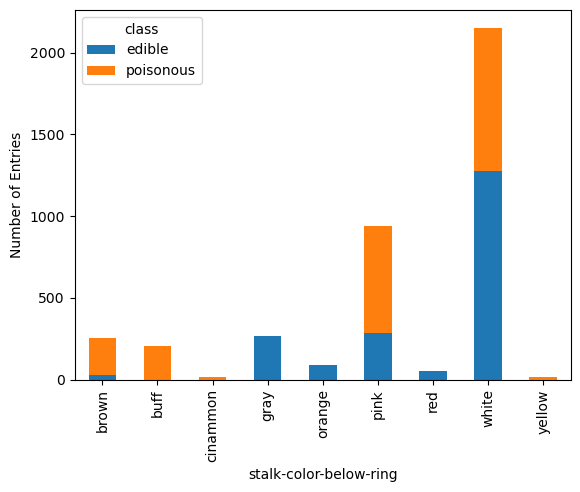

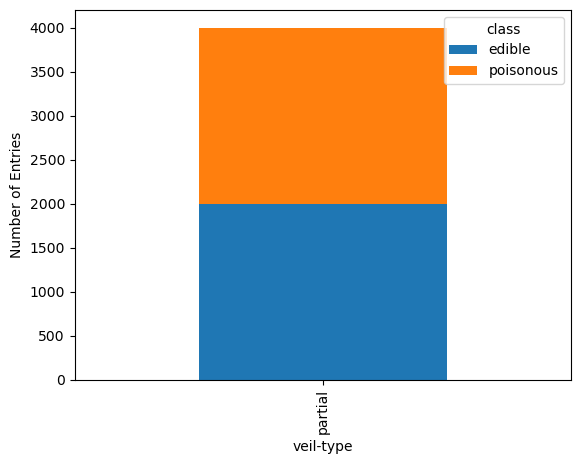

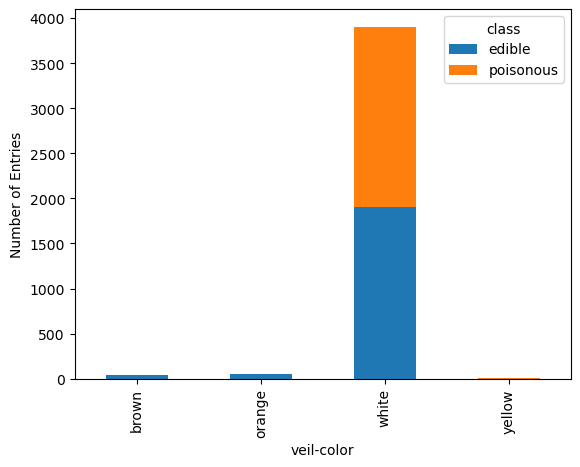

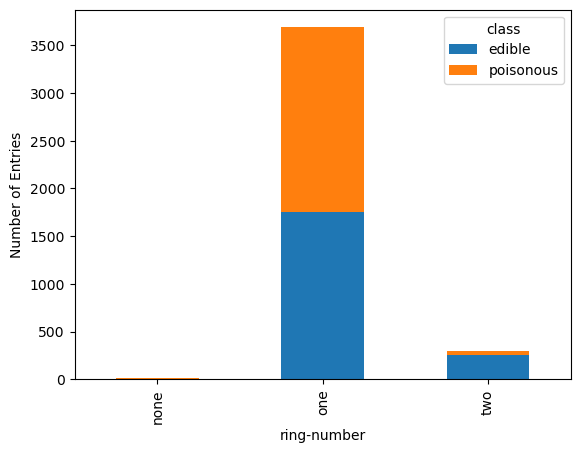

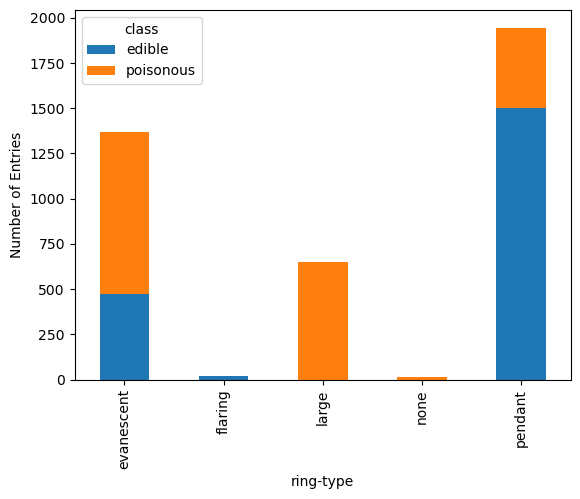

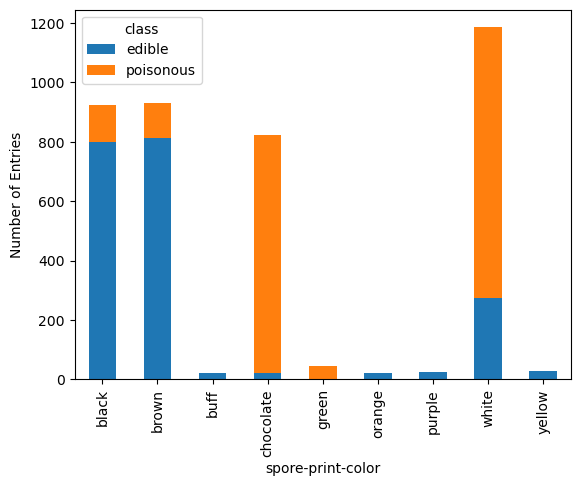

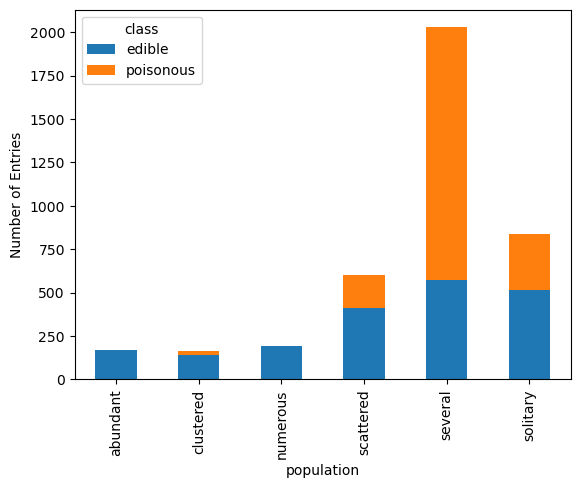

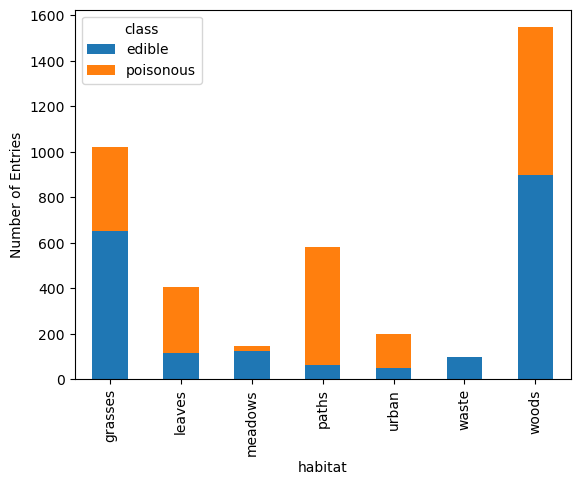

In [105]:
for col in df.columns:
    if col != 'class':
        stacked_bar = pd.crosstab(df[col], df['class'])
        stacked_bar.plot(kind='bar', stacked=True)
        plt.ylabel('Number of Entries')
        plt.show()

The above stacked bar charts show a breakdown of the split of edible (blue) and poisonous (orange) for every value within the 22 categoricl attributes. This enables us to understand the likelihood of a mushroom with a given quality being dangerous to consume, for example, where spore-print-color is chocolate, there is a high likelihood that the mushroom is poisonous (out of approx. 800 samples), but if the spore-print-color is black or brown, the likelihood is that the mushroom is safe to consume (out of approx 900 samples)